# Explore here

In [68]:
#Imports
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.api as sm 
import xgboost as xgb
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn.metrics import root_mean_squared_error
from sklearn.linear_model import LassoCV


Loading the dataset 

In [2]:
df = pd.read_csv('/workspaces/JMP1ST-https-github.com-4GeeksAcademy-machine-learning-python-template/data/raw/demographic_health_data.csv')
pd.set_option('display.max_columns', None)
df.head()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,40-49,40-49 y/o % of total pop,50-59,50-59 y/o % of total pop,60-69,60-69 y/o % of total pop,70-79,70-79 y/o % of total pop,80+,80+ y/o % of total pop,White-alone pop,% White-alone,Black-alone pop,% Black-alone,Native American/American Indian-alone pop,% NA/AI-alone,Asian-alone pop,% Asian-alone,Hawaiian/Pacific Islander-alone pop,% Hawaiian/PI-alone,Two or more races pop,% Two or more races,POP_ESTIMATE_2018,N_POP_CHG_2018,GQ_ESTIMATES_2018,R_birth_2018,R_death_2018,R_NATURAL_INC_2018,R_INTERNATIONAL_MIG_2018,R_DOMESTIC_MIG_2018,R_NET_MIG_2018,Less than a high school diploma 2014-18,High school diploma only 2014-18,Some college or associate's degree 2014-18,Bachelor's degree or higher 2014-18,Percent of adults with less than a high school diploma 2014-18,Percent of adults with a high school diploma only 2014-18,Percent of adults completing some college or associate's degree 2014-18,Percent of adults with a bachelor's degree or higher 2014-18,POVALL_2018,PCTPOVALL_2018,PCTPOV017_2018,PCTPOV517_2018,MEDHHINC_2018,CI90LBINC_2018,CI90UBINC_2018,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,Median_Household_Income_2018,Med_HH_Income_Percent_of_State_Total_2018,Active Physicians per 100000 Population 2018 (AAMC),Total Active Patient Care Physicians per 100000 Population 2018 (AAMC),Active Primary Care Physicians per 100000 Population 2018 (AAMC),Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC),Active General Surgeons per 100000 Population 2018 (AAMC),Active Patient Care General Surgeons per 100000 Population 2018 (AAMC),Total nurse practitioners (2019),Total physician assistants (2019),Total Hospitals (2019),Internal Medicine Primary Care (2019),Family Medicine/General Practice Primary Care (2019),Total Specialist Physicians (2019),ICU Beds_x,Total Population,Population Aged 60+,Percent of Population Aged 60+,COUNTY_NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,county_pop2018_18 and older,anycondition_prevalence,anycondition_Lower 95% CI,anycondition_Upper 95% CI,anycondition_number,Obesity_prevalence,Obesity_Lower 95% CI,Obesity_Upper 95% CI,Obesity_number,Heart disease_prevalence,Heart disease_Lower 95% CI,Heart disease_Upper 95% CI,Heart disease_number,COPD_prevalence,COPD_Lower 95% CI,COPD_Upper 95% CI,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,7582,13.636445,7738,13.917016,5826,10.478229,4050,7.284042,2014,3.622237,42660,76.725239,10915,19.630942,267,0.480207,681,1.224798,62,0.111509,1016,1.827305,55601,158,455,11.8,9.6,2.2,0.0,0.7,0.6,4204,12119,10552,10291,11.3,32.6,28.4,27.7,7587,13.8,19.3,19.5,59338,53628,65048,25957,25015,942,3.6,59338,119.0,217.1,196.7,77.2,71.2,7.6,6.9,28.859137,6.085786,1.148905,25.992561,21.249061,72.142154,6,55036,10523,19.1,Autauga,Alabama,1,1,42438,47.6,45.4,49.4,20181,35.8,34.2,37.3,15193,7.9,7.2,8.7,3345,8.6,7.3,9.9,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,27338,12.539102,29986,13.753658,29932,13.728890,20936,9.602701,9368,4.296814,190301,87.285228,19492,8.940382,1684,0.772399,2508,1.150343,146,0.066966,3891,1.784682,218022,5403,2190,10.5,10.3,0.1,0.5,24.3,24.8,14310,40579,46025,46075,9.7,27.6,31.3,31.3,21069,9.8,13.9,13.1,57588,54437,60739,93849,90456,3393,3.6,57588,115.5,217.1,196.7,77.2,71.2,7.6,6.9,113.162114,23.863512,4.505074,101.921730,83.321572,282.882982,51,203360,53519,26.3,Baldwin,Alabama,1,3,170912,40.2,38.2,42.3,68790,29.7,28.4,31.0,50761,7.8,7.0,8.7,13414,8.6,7.2,10.1,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,3074,12.354809,3278,13.174712,3076,12.3

In [ ]:
#To display max cols and rows later on the analysis
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

Analysis (EDA)

In [4]:
#Let's start the anlysis by checking the dimiensions of the dataset in question (shape)
df.shape

(3140, 108)

We can see that we are working with 3140 rows spread throug 108 variables.

Let's now take a look at the info of each variable

In [ ]:
#Checking the value distribution 
df.info('display.max_columns')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Data columns (total 108 columns):
 #    Column                                                                         Dtype  
---   ------                                                                         -----  
 0    fips                                                                           int64  
 1    TOT_POP                                                                        int64  
 2    0-9                                                                            int64  
 3    0-9 y/o % of total pop                                                         float64
 4    19-Oct                                                                         int64  
 5    10-19 y/o % of total pop                                                       float64
 6    20-29                                                                          int64  
 7    20-29 y/o % of total pop                         

In [ ]:
#Searching for patterns in unique values
df.nunique()

fips                                                                             3140
TOT_POP                                                                          3074
0-9                                                                              2723
0-9 y/o % of total pop                                                           3136
19-Oct                                                                           2743
10-19 y/o % of total pop                                                         3137
20-29                                                                            2698
20-29 y/o % of total pop                                                         3137
30-39                                                                            2708
30-39 y/o % of total pop                                                         3133
40-49                                                                            2693
40-49 y/o % of total pop                              

In [ ]:
#Checking for null values
df.isnull().sum().sum()

np.int64(0)

In [ ]:
df.head()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,40-49,40-49 y/o % of total pop,50-59,50-59 y/o % of total pop,60-69,60-69 y/o % of total pop,70-79,70-79 y/o % of total pop,80+,80+ y/o % of total pop,White-alone pop,% White-alone,Black-alone pop,% Black-alone,Native American/American Indian-alone pop,% NA/AI-alone,Asian-alone pop,% Asian-alone,Hawaiian/Pacific Islander-alone pop,% Hawaiian/PI-alone,Two or more races pop,% Two or more races,POP_ESTIMATE_2018,N_POP_CHG_2018,GQ_ESTIMATES_2018,R_birth_2018,R_death_2018,R_NATURAL_INC_2018,R_INTERNATIONAL_MIG_2018,R_DOMESTIC_MIG_2018,R_NET_MIG_2018,Less than a high school diploma 2014-18,High school diploma only 2014-18,Some college or associate's degree 2014-18,Bachelor's degree or higher 2014-18,Percent of adults with less than a high school diploma 2014-18,Percent of adults with a high school diploma only 2014-18,Percent of adults completing some college or associate's degree 2014-18,Percent of adults with a bachelor's degree or higher 2014-18,POVALL_2018,PCTPOVALL_2018,PCTPOV017_2018,PCTPOV517_2018,MEDHHINC_2018,CI90LBINC_2018,CI90UBINC_2018,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,Median_Household_Income_2018,Med_HH_Income_Percent_of_State_Total_2018,Active Physicians per 100000 Population 2018 (AAMC),Total Active Patient Care Physicians per 100000 Population 2018 (AAMC),Active Primary Care Physicians per 100000 Population 2018 (AAMC),Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC),Active General Surgeons per 100000 Population 2018 (AAMC),Active Patient Care General Surgeons per 100000 Population 2018 (AAMC),Total nurse practitioners (2019),Total physician assistants (2019),Total Hospitals (2019),Internal Medicine Primary Care (2019),Family Medicine/General Practice Primary Care (2019),Total Specialist Physicians (2019),ICU Beds_x,Total Population,Population Aged 60+,Percent of Population Aged 60+,COUNTY_NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,county_pop2018_18 and older,anycondition_prevalence,anycondition_Lower 95% CI,anycondition_Upper 95% CI,anycondition_number,Obesity_prevalence,Obesity_Lower 95% CI,Obesity_Upper 95% CI,Obesity_number,Heart disease_prevalence,Heart disease_Lower 95% CI,Heart disease_Upper 95% CI,Heart disease_number,COPD_prevalence,COPD_Lower 95% CI,COPD_Upper 95% CI,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,7582,13.636445,7738,13.917016,5826,10.478229,4050,7.284042,2014,3.622237,42660,76.725239,10915,19.630942,267,0.480207,681,1.224798,62,0.111509,1016,1.827305,55601,158,455,11.8,9.6,2.2,0.0,0.7,0.6,4204,12119,10552,10291,11.3,32.6,28.4,27.7,7587,13.8,19.3,19.5,59338,53628,65048,25957,25015,942,3.6,59338,119.0,217.1,196.7,77.2,71.2,7.6,6.9,28.859137,6.085786,1.148905,25.992561,21.249061,72.142154,6,55036,10523,19.1,Autauga,Alabama,1,1,42438,47.6,45.4,49.4,20181,35.8,34.2,37.3,15193,7.9,7.2,8.7,3345,8.6,7.3,9.9,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,27338,12.539102,29986,13.753658,29932,13.728890,20936,9.602701,9368,4.296814,190301,87.285228,19492,8.940382,1684,0.772399,2508,1.150343,146,0.066966,3891,1.784682,218022,5403,2190,10.5,10.3,0.1,0.5,24.3,24.8,14310,40579,46025,46075,9.7,27.6,31.3,31.3,21069,9.8,13.9,13.1,57588,54437,60739,93849,90456,3393,3.6,57588,115.5,217.1,196.7,77.2,71.2,7.6,6.9,113.162114,23.863512,4.505074,101.921730,83.321572,282.882982,51,203360,53519,26.3,Baldwin,Alabama,1,3,170912,40.2,38.2,42.3,68790,29.7,28.4,31.0,50761,7.8,7.0,8.7,13414,8.6,7.2,10.1,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,3074,12.354809,3278,13.174712,3076,12.3

After exploring the dataset, we found that many variables were highly correlated or redundant, such as overlapping demographic rates, education levels that sum to 100%, and related income measures with confidence intervals. Population counts and geographic identifiers don’t add predictive value, and health condition confidence intervals reflect uncertainty rather than actual data. Age group and race percentages are compositional and can cause multicollinearity. Because of these issues, we decided to drop these columns early to reduce redundancy and improve model stability.

In [ ]:
#Dropping columns by batches as there are many
cols_to_drop = ['R_birth_2018','R_death_2018','R_INTERNATIONAL_MIG_2018','R_DOMESTIC_MIG_2018']
cols_to_drop1 = ['Percent of adults with less than a high school diploma 2014-18','Percent of adults with a high school diploma only 2014-18',"Percent of adults completing some college or associate's degree 2014-18","Percent of adults with a bachelor's degree or higher 2014-18"]
cols_to_drop2 = ["CI90LBINC_2018", "CI90UBINC_2018", "Unemployed_2018", "Median_Household_Income_2018", "Med_HH_Income_Percent_of_State_Total_2018", "ICU Beds_x"]
cols_to_drop3 = ["Total Population", "Population Aged 60+", "Percent of Population Aged 60+", "COUNTY_NAME", "STATE_NAME", "county_pop2018_18 and older"]
cols_to_drop4 = ["anycondition_Lower 95% CI", "anycondition_Upper 95% CI","Obesity_Lower 95% CI", "Obesity_Upper 95% CI", "Heart disease_Lower 95% CI", "Heart disease_Upper 95% CI", "COPD_Lower 95% CI", "COPD_Upper 95% CI", "diabetes_Lower 95% CI", "diabetes_Upper 95% CI", "CKD_Lower 95% CI","CKD_Upper 95% CI"]
cols_to_drop5 = ["0-9 y/o % of total pop", '10-19 y/o % of total pop', '20-29 y/o % of total pop', '30-39 y/o % of total pop', '40-49 y/o % of total pop', '50-59 y/o % of total pop', '60-69 y/o % of total pop', '70-79 y/o % of total pop', '80+ y/o % of total pop']
cols_to_drop6 = ['% White-alone', '% Black-alone', '% NA/AI-alone', '% Asian-alone', '% Hawaiian/PI-alone', '% Two or more races']

In [10]:
df.drop(columns=cols_to_drop)
print("cols_to_drop has been dropped")

cols_to_drop has been dropped


In [11]:
df.drop(columns=cols_to_drop1, inplace=True)
print("cols_to_drop1 has been dropped")

cols_to_drop1 has been dropped


In [12]:
df.drop(columns=cols_to_drop2, inplace=True)
print("cols_to_drop2 has been dropped")

cols_to_drop2 has been dropped


In [13]:
df.drop(columns=cols_to_drop3, inplace=True)
print("cols_to_drop3 has been dropped")

cols_to_drop3 has been dropped


In [14]:
df.drop(columns=cols_to_drop4, inplace=True)
print("cols_to_drop4 has been dropped")

cols_to_drop4 has been dropped


In [15]:
df.drop(columns=cols_to_drop5, inplace=True)
print("cols_to_drop5 has been dropped")

cols_to_drop5 has been dropped


In [16]:
df.drop(columns=cols_to_drop6, inplace=True)
print("cols_to_drop6 has been dropped")

cols_to_drop6 has been dropped


In [17]:
df.shape

(3140, 65)

In [18]:
#Checking for duplicated values 
df.T.duplicated(keep=False,).sort_values(ascending=False)

TOT_POP                                                                           True
POP_ESTIMATE_2018                                                                 True
Civilian_labor_force_2018                                                        False
Employed_2018                                                                    False
Unemployment_rate_2018                                                           False
Active Physicians per 100000 Population 2018 (AAMC)                              False
Total Active Patient Care Physicians per 100000 Population 2018 (AAMC)           False
Active Primary Care Physicians per 100000 Population 2018 (AAMC)                 False
Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC)    False
Active General Surgeons per 100000 Population 2018 (AAMC)                        False
Active Patient Care General Surgeons per 100000 Population 2018 (AAMC)           False
Total nurse practitioners (2019)           

In [ ]:
#Checking for duplicated values 
print(F"Amount of duplicated values is: {df.T.duplicated().sum()}")

Amount of duplicated values is: 1


In [20]:
(df['TOT_POP'] == df['POP_ESTIMATE_2018']).all()

np.True_

In [21]:
df.drop(columns=['POP_ESTIMATE_2018'], inplace=True)

In [74]:
df.head()

,fips,TOT_POP,0-9,19-Oct,20-29,30-39,40-49,50-59,60-69,70-79,80+,White-alone pop,Black-alone pop,Native American/American Indian-alone pop,Asian-alone pop,Hawaiian/Pacific Islander-alone pop,Two or more races pop,N_POP_CHG_2018,GQ_ESTIMATES_2018,R_NATURAL_INC_2018,R_NET_MIG_2018,Less than a high school diploma 2014-18,High school diploma only 2014-18,Some college or associate's degree 2014-18,Bachelor's degree or higher 2014-18,POVALL_2018,PCTPOVALL_2018,PCTPOV017_2018,PCTPOV517_2018,MEDHHINC_2018,Civilian_labor_force_2018,Unemployment_rate_2018,Total nurse practitioners (2019),Total physician assistants (2019),Total Hospitals (2019),Internal Medicine Primary Care (2019),Family Medicine/General Practice Primary Care (2019),Total Specialist Physicians (2019),STATE_FIPS,CNTY_FIPS,anycondition_prevalence,anycondition_number,Obesity_prevalence,Obesity_number,Heart disease_prevalence,Heart disease_number,COPD_prevalence,COPD_number,diabetes_prevalence,diabetes_number,CKD_prevalence,CKD_number,Urban_rural_code
0,1001,55601,6787,7637,6878,7089,7582,7738,5826,4050,2014,42660,10915,267,681,62,1016,158,455,2.2,0.6,4204,12119,10552,10291,7587,13.8,19.3,19.5,59338,25957,3.6,28.859137,6.085786,1.148905,25.992561,21.249061,72.142154,1,1,47.6,20181,35.8,15193,7.9,3345,8.6,3644,12.9,5462,3.1,1326,3
1,1003,218022,24757,26913,23579,25213,27338,29986,29932,20936,9368,190301,19492,1684,2508,146,3891,5403,2190,0.1,24.8,14310,40579,46025,46075,21069,9.8,13.9,13.1,57588,93849,3.6,113.162114,23.863512,4.505074,101.921730,83.321572,282.882982,1,3,40.2,68790,29.7,50761,7.8,13414,8.6,14692,12.0,20520,3.2,5479,4
2,1005,24881,2732,2960,3268,3201,3074,3278,3076,2244,1048,12209,12042,164,113,46,307,-277,2820,-2.5,-8.6,4901,6486,4566,2220,6788,30.9,43.9,36.7,34382,8373,5.2,12.914231,2.723340,0.514126,11.631462,9.508784,32.283033,1,5,57.5,11325,40.7,8013,11.0,2159,12.1,2373,19.7,3870,4.5,887,6
3,1007,22400,2456,2596,3029,3113,3038,3115,2545,1723,785,17211,4770,98,53,26,242,-155,2151,-0.3,-6.6,2650,7471,3846,1813,4400,21.8,27.8,26.3,46064,8661,4.0,11.626493,2.451783,0.462860,10.471635,8.560619,29.063942,1,7,51.6,9190,38.7,6894,8.6,1533,10.0,1789,14.1,2511,3.3,595,2
4,1009,57840,7095,7570,6742,6884,7474,7844,6965,4931,2335,55456,950,378,185,70,801,13,489,0.3,0.0,7861,13489,13267,5010,7527,13.2,18.0,15.5,50412,25006,3.5,30.021267,6.330854,1.195171,27.039257,22.104740,75.047251,1,9,46.3,20584,34.0,15112,9.2,4101,10.5,4661,13.5,6017,3.4,1507,2


In [ ]:
#Dropping columns that were ignored before 
df.drop(columns=['R_INTERNATIONAL_MIG_2018', 'R_DOMESTIC_MIG_2018', 'R_birth_2018', 'R_death_2018', 'Employed_2018', 'Active Physicians per 100000 Population 2018 (AAMC)'], inplace=True)

In [ ]:
#Dropping columns that were ignored before 
df.drop(columns=['Total Active Patient Care Physicians per 100000 Population 2018 (AAMC)','Active Primary Care Physicians per 100000 Population 2018 (AAMC)', 'Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC)', 'Active General Surgeons per 100000 Population 2018 (AAMC)', 'Active Patient Care General Surgeons per 100000 Population 2018 (AAMC)'], inplace=True)

In [75]:
df.shape

(3140, 53)

The new df contains 3140 rows and 53 variables after being cleaned

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fips,3140.0,30401.640764,15150.559265,1001.000000,18180.500000,29178.000000,45081.500000,5.604500e+04
TOT_POP,3140.0,104189.412420,333583.395432,88.000000,10963.250000,25800.500000,67913.000000,1.010552e+07
0-9,3140.0,12740.302866,41807.301846,0.000000,1280.500000,3057.000000,8097.000000,1.208253e+06
19-Oct,3140.0,13367.976752,42284.392134,0.000000,1374.500000,3274.000000,8822.250000,1.239139e+06
20-29,3140.0,14469.331529,49577.725396,0.000000,1263.750000,3108.000000,8976.250000,1.557073e+06
30-39,3140.0,13916.490127,48990.951710,11.000000,1232.750000,3000.500000,8314.250000,1.501844e+06
40-49,3140.0,12885.214331,43472.189993,4.000000,1245.250000,3048.500000,8120.500000,1.350076e+06
50-59,3140.0,13638.031529,42720.629434,14.000000,1483.000000,3515.500000,9157.250000,1.306003e+06
60-69,3140.0,11916.213057,34518.581878,20.000000,1476.500000,3410.000000,8710.500000,1.014325e+06
70-79,3140.0,7220.310510,20287.498429,6.000000,950.750000,2177.000000,5574.000000,5.725300e+05


The dataset includes 3,140 county-level observations with wide variability in population sizes, ranging from very small (under 100) to over 10 million. Age group and race populations show high variability, indicating diverse demographic distributions across counties. Socioeconomic indicators such as income and poverty rates also vary considerably, reflecting economic disparities. Health-related prevalence rates (e.g., obesity, heart disease, diabetes) have relatively consistent means with moderate spread, showing some variation but more stability than demographic variables. Overall, the data reveals substantial heterogeneity across counties in demographic, socioeconomic, and health factors, which will impact modeling and interpretation.

No categorical variables were found in the dataset. Therefore, no encoding is needed, and all features are already in numerical format.
The dataset is ready for the next steps (train-test split and scaling)

Data partitioning

In [27]:
#Saving a clean_df 
cleaned_df = df.copy()
cleaned_df.to_csv('cleaned_df.csv')

In [28]:
#Variables to drop from our train and test set
healt_condition = ['anycondition_prevalence', 'anycondition_number', 'Obesity_number','Obesity_prevalence','Heart disease_prevalence','Heart disease_number', 'COPD_prevalence', 'COPD_number', 'diabetes_prevalence','diabetes_number','CKD_prevalence','CKD_number']

#Spliting the data
X = cleaned_df.drop(columns=healt_condition)
y = cleaned_df['Obesity_prevalence']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
X_train.shape

(2512, 41)

In [30]:
X_test.shape

(628, 41)

Influential observations

OLS MODEL

In [31]:
#Adding constant to adjust the model
X_train_const = sm.add_constant(X_train)

#OLS (Instancing the OLS model first)
model = sm.OLS(y_train, X_train_const).fit()

#Influence and cook distance
cooks_distance = model.get_influence().cooks_distance

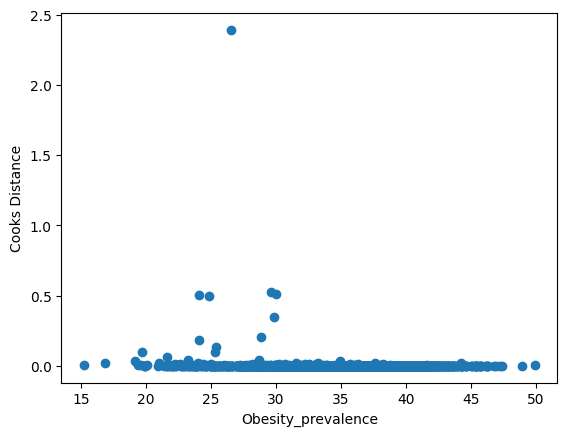

In [32]:
#Plotting 
plt.scatter(y_train, cooks_distance[0])
plt.xlabel('Obesity_prevalence')
plt.ylabel('Cooks Distance')
plt.show()

The Cook’s Distance analysis revealed a small number of highly influential data points in the training set. Removing these observations could improve model robustness by reducing the impact of extreme values or outliers.

In [33]:
#Defining cut_point 
cut_point = 4 / len(X_train)

In [ ]:
#Checking the position where cooks distance is >0.025
np.where(cooks_distance[0] > 0.025)[0]

array([ 109,  119,  179,  283,  549,  749,  782, 1083, 1126, 1227, 1315,
       1922, 1927, 2275, 2285, 2318])

In [ ]:
#idx of influential variables is where the cooks distance is greater than the cut_point 
idx_influ_var = np.where(cooks_distance[0] > cut_point)[0]

In [36]:
#Checking number of influential variables to drop 
print(f'Porcentage of influential variables to drop is: {len(idx_influ_var) / len(X_train) * 100:.2f}%')

Porcentage of influential variables to drop is: 4.50%


In [37]:
#Dropping 4.86% of variables following class method
X_train1 = X_train.loc[~X_train.index.isin(X_train.index[idx_influ_var]), :]
y_train1 = y_train.loc[~X_train.index.isin(X_train.index[idx_influ_var])]

Selecting the variables

In [38]:
#Instancing the model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42).fit(X_train1, y_train1)

#Building an importances_df
dict_data = {'Feature':X_train.columns, 'Importances':xgb_model.feature_importances_*100}
df_imp = pd.DataFrame(dict_data)

#Orderby desc
df_imp.sort_values(by='Importances', ascending=False, inplace=True)

In [39]:
#Importances <1
df_imp[df_imp['Importances']>=1]

,Feature,Importances
27,PCTPOV017_2018,20.624811
38,STATE_FIPS,16.819592
24,Bachelor's degree or higher 2014-18,6.975815
29,MEDHHINC_2018,6.925071
28,PCTPOV517_2018,4.027461
21,Less than a high school diploma 2014-18,3.597156
26,PCTPOVALL_2018,3.366814
0,fips,3.224346
12,Black-alone pop,1.965966
20,R_NET_MIG_2018,1.905589


In [40]:
#Defining list of features to drop
features_to_drop = df_imp[df_imp['Importances'] < 1]['Feature']

#Droping the features and reassign
X_train1 = X_train1.drop(columns=features_to_drop)
X_test = X_test.drop(columns=features_to_drop)

VIF

In [41]:
vif = pd.Series([variance_inflation_factor(X_train1.corr().values, i) for i in range(X_train1.corr().shape[1])], index=X_train1.columns)
vif

/home/vscode/.local/lib/python3.11/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


fips                                                             inf
0-9                                                     6.824713e+04
Black-alone pop                                         2.478846e+02
Asian-alone pop                                         1.082260e+03
Hawaiian/Pacific Islander-alone pop                     1.064326e+02
GQ_ESTIMATES_2018                                       4.143569e+02
R_NET_MIG_2018                                          5.513061e+00
Less than a high school diploma 2014-18                 8.888837e+03
High school diploma only 2014-18                        9.641595e+03
Bachelor's degree or higher 2014-18                     9.413009e+03
PCTPOVALL_2018                                          9.968576e+02
PCTPOV017_2018                                          5.520229e+04
PCTPOV517_2018                                          4.338334e+04
MEDHHINC_2018                                           2.904793e+02
Unemployment_rate_2018            

<Axes: >

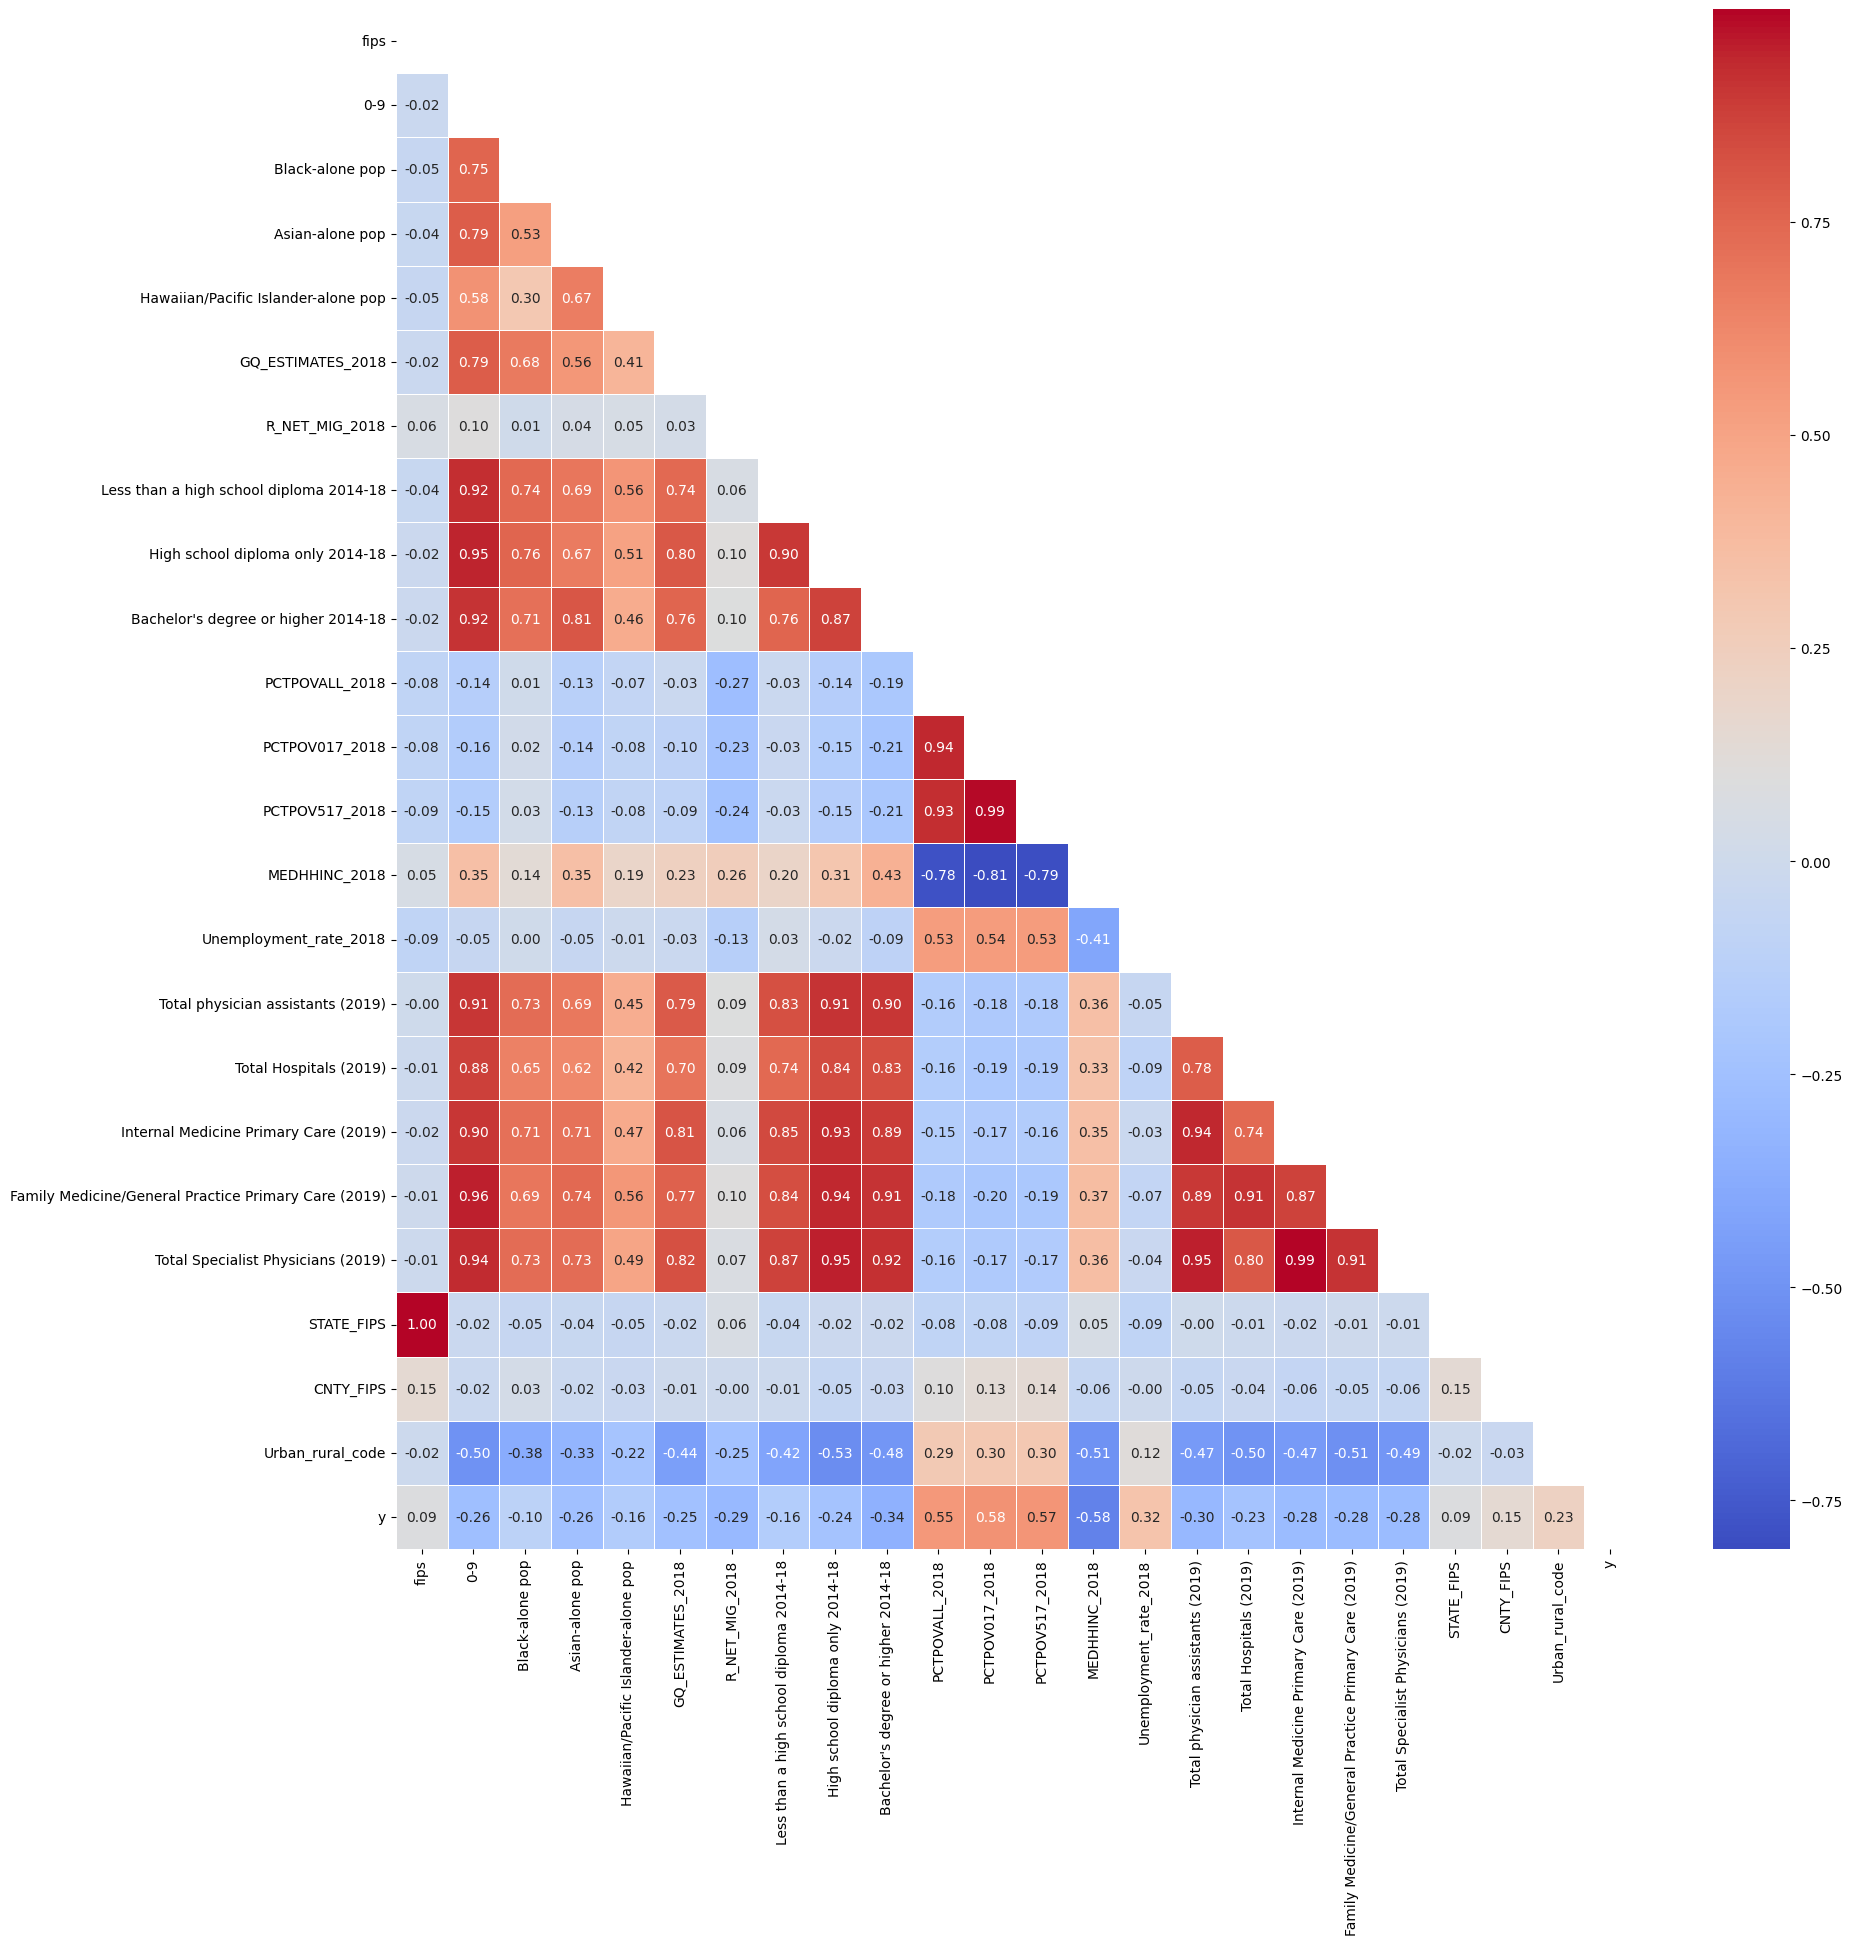

In [42]:
#Correlations maps
X_corr = X_train1.copy()
X_corr['y'] = y_train1
corr = X_corr.corr()
#corr.style.background_gradient(cmap='coolwarm').format(precision=3)

mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(20,20))
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')

In [43]:
#Define columns to drop due to high correlation between them
cols_to_drop = ["STATE_FIPS","CNTY_FIPS","High school diploma only 2014-18","PCTPOV517_2018","Internal Medicine Primary Care (2019)","Family Medicine/General Practice Primary Care (2019)"]

#Droping those cols
X_train2 = X_train1.drop(columns=cols_to_drop).copy()
X_test1 = X_test.drop(columns=cols_to_drop).copy()

To improve the quality of the model, we checked for multicollinearity, which happens when some features (variables) are too similar to each other.

Based on these, we removed some features that were "almost" duplicates in the information they provided. For example:

"PCTPOV517_2018" was "almost" the same as "PCTPOV017_2018".

"High school diploma only" was strongly tied to "Bachelor's degree or higher".

Medical features like "Internal Medicine Primary Care" were highly related to "Total Specialist Physicians".

In [44]:
#Checking the VIF again once those variables has been droped
vif = pd.Series([variance_inflation_factor(X_train2.corr().values, i) for i in range(X_train2.corr().shape[1])], index=X_train2.columns)
vif

fips                                           1.164820
0-9                                        22880.475480
Black-alone pop                               99.617972
Asian-alone pop                              487.669681
Hawaiian/Pacific Islander-alone pop           88.744733
GQ_ESTIMATES_2018                            170.513641
R_NET_MIG_2018                                 3.021818
Less than a high school diploma 2014-18     5123.849392
Bachelor's degree or higher 2014-18         6723.576440
PCTPOVALL_2018                               553.123737
PCTPOV017_2018                               661.256287
MEDHHINC_2018                                122.796994
Unemployment_rate_2018                         5.587374
Total physician assistants (2019)           1714.684174
Total Hospitals (2019)                      1027.167816
Total Specialist Physicians (2019)          4319.551268
Urban_rural_code                              20.388253
dtype: float64

Despite of droping the variables that were considered reasonable based on similarity between eachother values, the VIF analysis revealed very high multicollinearity among many features, with some variables showing extremely large VIF values. This means that several predictors are highly correlated and provide overlapping information, which causes instability in the coefficients of a basic linear regression model and makes interpretation difficult. Because of these issues,I have come to conclude that the best (approach aligned with the project instructions) is to start with a simple linear regression to demonstrate the effect of multicollinearity, then apply Lasso regression method to remove redundant variables and reduce multicollinearity.

Therefore, let's scale the data and analyse the metrics of this model

In [45]:
#Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train2)

In [46]:
#Converting scaled data back to DataFrame with column names
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train2.columns, index=X_train2.index)

In [47]:
print(X_train_scaled_df.shape, y_train1.shape)

(2399, 17) (2399,)


In [ ]:
#Adding constant for intercept
X_train_scaled_const = sm.add_constant(X_train_scaled_df)

#Fiting the OLS model
ols_model_scaled = sm.OLS(y_train1, X_train_scaled_const).fit()

print(ols_model_scaled.summary())


                            OLS Regression Results                            
Dep. Variable:     Obesity_prevalence   R-squared:                       0.478
Model:                            OLS   Adj. R-squared:                  0.474
Method:                 Least Squares   F-statistic:                     128.0
Date:                Sun, 15 Jun 2025   Prob (F-statistic):          6.64e-320
Time:                        23:24:06   Log-Likelihood:                -6082.0
No. Observations:                2399   AIC:                         1.220e+04
Df Residuals:                    2381   BIC:                         1.230e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

The OLS model explains about 48% of the variance in obesity prevalence, but the very high VIF values show strong multicollinearity among predictors. This multicollinearity doesn’t directly lower R² but makes the model unstable and less reliable, limiting its predictive power. To improve this, we’ll apply Lasso regression to reduce redundancy and enhance model performance.

Below, we will be evaluating the performance of Lasso Regression for the same set of data and comparing it's results. 

In [53]:
#To convert it back to a DataFrame 
X_test_scaled = scaler.transform(X_test1)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test1.columns, index=X_test1.index)

#Setting Lasso Regression for R2 analysis
alphas = np.linspace(0.01, 20, 50) 

#Where to store those results
r2_train = []
r2_test = []

#Constructed merging parts of code from stackoverflow, internet and programing forums
for alpha in alphas:
    #Initialize alpha
    lasso = Lasso(alpha=alpha, max_iter=10000)
    #Fitting of the scaled data and y_train1
    lasso.fit(X_train_scaled_df, y_train1)
    #Predict on y_train1
    y_train1_pred = lasso.predict(X_train_scaled_df)
    #Predict on y_test 
    y_test_pred = lasso.predict(X_test_scaled_df)
    #Store those r2 socores in variables
    r2_train.append(r2_score(y_train1, y_train1_pred))
    r2_test.append(r2_score(y_test, y_test_pred))

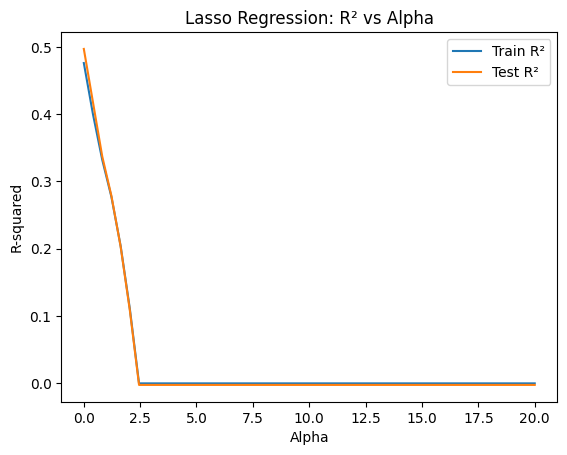

In [55]:
#Plotting
plt.plot(alphas, r2_train, label='Train R²')
plt.plot(alphas, r2_test, label='Test R²')
plt.xlabel('Alpha')
plt.ylabel('R-squared')
plt.title('Lasso Regression: R² vs Alpha')
plt.legend()
plt.show()

 We see that at very low alpha values (close to zero), the model achieves its highest R² (~0.5), indicating a decent fit. However, as alpha increases beyond about 2.5, the R² quickly drops to zero for both train and test sets, meaning the model essentially loses all predictive power due to over-regularization. This suggests that strong regularization eliminates important features, so choosing a small alpha is critical to maintain model performance.

Let's begin with the lasso model 

In [56]:
#Finding best alpha 
best_alpha_idx = np.argmax(r2_test)
best_alpha = alphas[best_alpha_idx]
print(f"Best alpha: {best_alpha:.3f} with Test R²: {r2_test[best_alpha_idx]:.3f}")

Best alpha: 0.010 with Test R²: 0.497


In [57]:
#Fitting and passing the final lasso data 
final_lasso = Lasso(alpha=best_alpha, max_iter=10000)
final_lasso.fit(X_train_scaled_df, y_train1)

,alpha,np.float64(0.01)
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,10000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [58]:
coef_df = pd.Series(final_lasso.coef_, index=X_train_scaled_df.columns)
print(coef_df[coef_df == 0])
print(coef_df[coef_df != 0])

Series([], dtype: float64)
fips                                       0.558094
0-9                                        1.207632
Black-alone pop                            0.416346
Asian-alone pop                            0.210813
Hawaiian/Pacific Islander-alone pop       -0.223721
GQ_ESTIMATES_2018                         -0.829335
R_NET_MIG_2018                            -0.692582
Less than a high school diploma 2014-18   -0.430937
Bachelor's degree or higher 2014-18       -1.866392
PCTPOVALL_2018                             0.389286
PCTPOV017_2018                             1.075551
MEDHHINC_2018                             -0.939147
Unemployment_rate_2018                     0.102994
Total physician assistants (2019)         -0.741064
Total Hospitals (2019)                     0.316188
Total Specialist Physicians (2019)         0.943731
Urban_rural_code                          -0.513913
dtype: float64


The Lasso regression retained all features without shrinking any coefficients to zero, indicating that each variable contributes to predicting obesity prevalence. Key negative associations include higher education levels, median household income, urbanization, and availability of physician assistants, which relate to lower obesity rates. Conversely, factors such as a higher proportion of young children, child poverty, Black population share, unemployment, and specialist physicians are positively associated with obesity prevalence.

In [67]:
#Evaluation of the final mode using test set
y_test_pred = final_lasso.predict(X_test_scaled_df)
print(f"Test R²: {r2_score(y_test, y_test_pred):.3f}")
print(f"Test RMSE: {root_mean_squared_error(y_test, y_test_pred):.3f}")

Test R²: 0.497
Test RMSE: 3.223


The Lasso regression model achieved a Test R² of 0.497, indicating that about 49.7% of the variance in the target variable is explained by the model. The Test RMSE of 3.223 shows the average prediction error magnitude. While the model captures some meaningful patterns, there is still considerable unexplained variance and prediction error, suggesting that further optimization and feature refinement may improve performance.

Hyperparameter tuning

In [ ]:
#Using cross validation to find optimal alpha
lasso_cv = LassoCV(alphas=None, cv=5, max_iter=10000)
lasso_cv.fit(X_train_scaled_df, y_train1)

best_alpha = lasso_cv.alpha_
print(f"Optimal alpha using CV: {best_alpha:.4f}")

Optimal alpha via CV: 0.0025


/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:1632: FutureWarning: 'alphas=None' is deprecated and will be removed in 1.9, at which point the default value will be set to 100. Set 'alphas=100' to silence this warning.
  warnings.warn(


In [70]:
#Now let's train a final model with the best alpha found using CV
final_lasso = Lasso(alpha=best_alpha, max_iter=10000)
final_lasso.fit(X_train_scaled_df, y_train1)

,alpha,np.float64(0....6956670702636)
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,10000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [72]:
#Checking final metrics

#Predicting on test set
y_test_pred = final_lasso.predict(X_test_scaled_df)

#Metrics
test_r2 = r2_score(y_test, y_test_pred)
test_rmse = root_mean_squared_error(y_test, y_test_pred)

print(f"Test R²: {test_r2:.3f}")
print(f"Test RMSE: {test_rmse:.3f}")

Test R²: 0.498
Test RMSE: 3.221


Test R² improved from 0.497 to 0.498, RMSE decreased from 3.223 to 3.221. The improvement is small but shows that hyperparameter tuning helped stabilize the model 

Final observation: 

We observed that the initial linear regression model showed limitations due to multicollinearity and unregularized features, resulting in moderate predictive performance. Applying Lasso regularization helped manage correlated predictors by shrinking some coefficients to zero, improving model interpretability and slightly increasing test R² from approximately 0.49 to 0.50. This demonstrates the challenges of working with real-world datasets where feature correlations and lack of cleaning(or managment of those strong correlations) can hinder model accuracy. The "solution" of this exercise highlights the importance of regularization techniques in building robust predictive models and gaining insight into the dataset’s underlying structure, which as far as I can see is often messy and complex plus the difficulties of not being an expert in the specific area. 

NOTE:


I’ve found this project to be the most challenging of all my assignments so far. While I know I’m capable of doing a better job, I’m feeling bottlenecked by the number of projects I have and can’t afford to spend more time diving deeper into this one right now.